In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

import plotly.express as px
import pandas as pd



raw_df = pd.read_csv("data.csv")

In [3]:
questions = ['On average, how many hours do you work at a paid job per week?',
             'On average, how many hours do you work at a research lab per week? ',
             'On average, what percentage of school expenses does your scholarship cover? (Enter 0 if not applicable)',
             'On average, what percentage of school expenses does your financial aid cover? (Enter 0 if not applicable.)',
             'How many jobs and internships have you applied for during your college career?',
             'What is your current GPA? ']

aliases = ['Paid Job Hours',
           'Research Lab Hours',
           'Scholarship Percentage',
           'Finaid Percentage',
           'Num Applications',
           'GPA']

df = raw_df[questions]

#rename columns to aliases
for i in range(len(questions)):
  df = df.rename(columns={questions[i]: aliases[i]})

df



,Paid Job Hours,Research Lab Hours,Scholarship Percentage,Finaid Percentage,Num Applications,GPA
0,0.0,0.0,0.0,70.0,15.0,3.50 to 4.00
1,0.0,0.0,0.0,0.0,5.0,3.50 to 4.00
2,0.0,8.0,0.0,0.0,6.0,3.50 to 4.00
3,15.0,0.0,70.0,30.0,20.0,3.50 to 4.00
4,0.0,0.0,0.0,90.0,80.0,3.50 to 4.00
...,...,...,...,...,...,...
73,6.0,0.0,0.0,80.0,6.0,3.50 to 4.00
74,0.0,2.0,0.0,0.0,10.0,3.50 to 4.00
75,20.0,0.0,0.0,60.0,3.0,3.00 to 3.49
76,30.0,0.0,0.0,60.0,8.0,3.00 to 3.49


In [4]:
gpagroup = df.groupby(["GPA"]).mean()
gpagroup

,Paid Job Hours,Research Lab Hours,Scholarship Percentage,Finaid Percentage,Num Applications
GPA,,,,,
2.50 to 2.99,10.000000,0.000000,0.000000,60.000000,40.000000
3.00 to 3.49,6.090909,0.000000,10.909091,50.454545,13.545455
3.50 to 4.00,3.750000,0.491803,8.677419,45.541148,54.290323


In [19]:
# for paid job TO REJECT THE NULL HYPOTHESIS YOU NEED .07
1.75 + .03 + 1.24

3.02

In [20]:
# Highest chi squared is research lab hours lowest is financial aid

In [5]:

gpagroup = df.groupby(["GPA"]).mean()

# gpagroup

# (data - np.min(data)) / (np.max(data) - np.min(data))
normalized_gpa= (gpagroup - np.min(gpagroup)) / (np.max(gpagroup) - np.min(gpagroup))
normalized_gpa

,Paid Job Hours,Research Lab Hours,Scholarship Percentage,Finaid Percentage,Num Applications
GPA,,,,,
2.50 to 2.99,1.000000,0.0,0.00000,1.000000,0.649273
3.00 to 3.49,0.374545,0.0,1.00000,0.339819,0.000000
3.50 to 4.00,0.000000,1.0,0.79543,0.000000,1.000000


In [6]:
normalized_gpa.iloc[1]

Paid Job Hours            0.374545
Research Lab Hours        0.000000
Scholarship Percentage    1.000000
Finaid Percentage         0.339819
Num Applications          0.000000
Name: 3.00 to 3.49, dtype: float64

In [7]:
dataframes = []

for i in range(len(normalized_gpa)):
    gpa = normalized_gpa.iloc[i].to_frame()
    gpa.index.name = 'y'
    gpa.reset_index(inplace=True)
    gpa.columns.values[0] = "b"
    gpa.columns.values[1] = "a"
    dataframes.append(gpa)

In [8]:
dataframes

[                        b         a
 0          Paid Job Hours  1.000000
 1      Research Lab Hours  0.000000
 2  Scholarship Percentage  0.000000
 3       Finaid Percentage  1.000000
 4        Num Applications  0.649273,
                         b         a
 0          Paid Job Hours  0.374545
 1      Research Lab Hours  0.000000
 2  Scholarship Percentage  1.000000
 3       Finaid Percentage  0.339819
 4        Num Applications  0.000000,
                         b        a
 0          Paid Job Hours  0.00000
 1      Research Lab Hours  1.00000
 2  Scholarship Percentage  0.79543
 3       Finaid Percentage  0.00000
 4        Num Applications  1.00000]

In [9]:
fig = px.line_polar(dataframes[2],theta='b', r='a',  line_close=True)
# fig = px.line_polar(dataframes[1],theta='b', r='a',  line_close=True)
fig.data[0].line.color = 'rgb(255, 0, 0)'
fig.update_traces(fill='toself')
fig.show()

In [10]:
import plotly.graph_objects as go
fig = go.Figure()


for x in range(len(dataframes)):
    fig.add_trace(go.Scatterpolar(
      r=dataframes[x]['a'],
      theta=dataframes[x]['b'],
      fill='toself',
      name='Product A'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()

print("lowest to highest, blue red green")

lowest to highest, blue red green


In [11]:
gpagroup = df.groupby(["GPA"]).mean()

In [12]:
dataframes = []

for i in range(len(gpagroup)):
    gpa2 = gpagroup.iloc[i].to_frame()
    gpa2.index.name = 'y'
    gpa2.reset_index(inplace=True)
    gpa2.columns.values[0] = "b"
    gpa2.columns.values[1] = "a"
    dataframes.append(gpa2)

In [13]:
dataframes

[                        b     a
 0          Paid Job Hours  10.0
 1      Research Lab Hours   0.0
 2  Scholarship Percentage   0.0
 3       Finaid Percentage  60.0
 4        Num Applications  40.0,
                         b          a
 0          Paid Job Hours   6.090909
 1      Research Lab Hours   0.000000
 2  Scholarship Percentage  10.909091
 3       Finaid Percentage  50.454545
 4        Num Applications  13.545455,
                         b          a
 0          Paid Job Hours   3.750000
 1      Research Lab Hours   0.491803
 2  Scholarship Percentage   8.677419
 3       Finaid Percentage  45.541148
 4        Num Applications  54.290323]

In [14]:
import plotly.graph_objects as go
fig = go.Figure()


for x in range(len(dataframes)):
    fig.add_trace(go.Scatterpolar(
      r=dataframes[x]['a'],
      theta=dataframes[x]['b'],
      fill='toself',
      name='Product A'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 70]
    )),
  showlegend=False
)

fig.show()

print("lowest to highest, blue red green")

lowest to highest, blue red green


In [15]:
# normalized_df=(df-df.mean())/df.std()
gpagroup = (gpagroup-gpagroup.mean()) / gpagroup.std()
gpagroup


dataframes = []

for i in range(len(gpagroup)):
    gpa2 = gpagroup.iloc[i].to_frame()
    gpa2.index.name = 'y'
    gpa2.reset_index(inplace=True)
    gpa2.columns.values[0] = "b"
    gpa2.columns.values[1] = "a"
    dataframes.append(gpa2)

import plotly.graph_objects as go
fig = go.Figure()


for x in range(len(dataframes)):
    fig.add_trace(go.Scatterpolar(
      r=dataframes[x]['a'],
      theta=dataframes[x]['b'],
      fill='toself',
      name='Product A'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2]
    )),
  showlegend=False
)


fig.show()

print("lowest to highest, blue red green")

lowest to highest, blue red green


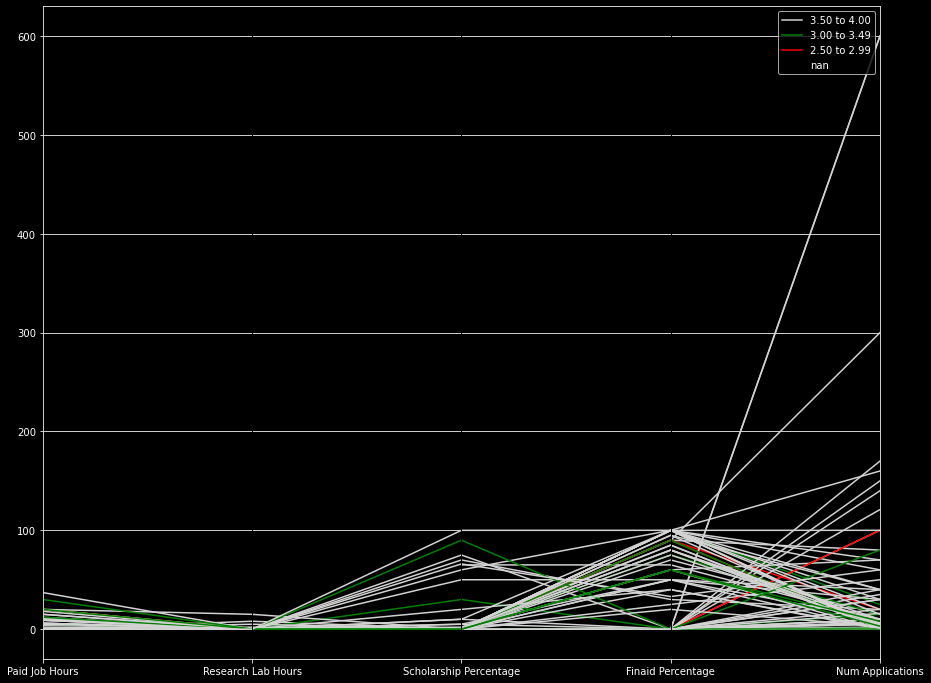

In [16]:
#Diego's Part

from pandas.plotting import parallel_coordinates

df4 = df[['Paid Job Hours',
           'Research Lab Hours',
           'Scholarship Percentage',
           'Finaid Percentage',
           'Num Applications',
           'GPA']]

plt.figure(figsize=(15,12))
parallel_coordinates(df4, 'GPA', color = ['lightgrey', 'green', 'red', 'black'])
plt.show()

In [17]:
#chi-squared test
from scipy.stats import chi2_contingency
normalized_gpa

y,Paid Job Hours,Research Lab Hours,Scholarship Percentage,Finaid Percentage,Num Applications
GPA,,,,,
2.50 to 2.99,1.000000,0.0,0.00000,1.000000,0.649273
3.00 to 3.49,0.374545,0.0,1.00000,0.339819,0.000000
3.50 to 4.00,0.000000,1.0,0.79543,0.000000,1.000000


In [18]:
#source: https://python-bloggers.com/2020/09/how-to-run-chi-square-test-in-python/#:~:text=How%20to%20run%20Chi-
#Square%20Test%20in%20Python%201,%23%20Chi-square%20test%20of%20independence.%205%20Inference.%20

c, p, dof, expected = chi2_contingency(normalized_gpa)
p

0.6871807114404601